# [LELEC2870] - Machine Learning

## Practical Session 2 - Model selection 

Prof. Michel Verleysen<br>
Prof. John Lee<br>

**Teaching assistants :**  
Edouard Couplet : edouard.couplet@uclouvain.be  <br>
Audrey Vermeulen: audrey.vermeulen@uclouvain.be<br>
Maxime Zanella: maxime.zanella@uclouvain.be<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## uncomment if you want to ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

## Dataset

The aim of this exercise session is to get familiar with the concept of **model selection**. But, before entering into the details, let's open a small dataset that we will use throughout the exercises. The code is already provided below.

<div class="alert alert-warning">

**Dataset description**
    
The dataset is related to red variant of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
   
    

**Features**
    
1. **fixed acidity**
2. **volatile acidity**
3. **citric acid**
4. **residual sugar**
5. **chlorides**
6. **free sulfur dioxide**
7. **total sulfur dioxide**
8. **density**
9. **pH**
10. **sulphates**
11. **alcohol**
    
**Target**
       
10. **quality**: score between 0 and 10
    
</div>



In [3]:
df = pd.read_csv("data/winequality-red.csv")
X = df.drop("quality", axis=1).values
y = df["quality"].values

# df.info()
# df.head()

## Why model selection ?

In supervised machine learning, we can tackle a same prediction problem with numerous possible models, each with various hyperparameters. **Model selection** is the process of selecting a model, among various candidates, which achieves the best performances according to some performance criterion. 

While it might be tempting to train a model on all available data and simply choose the model with the smallest loss, it might not be a good idea in practice: this could lead to **overfitting**. 

<div class="alert alert-warning">
<b>Question</b>  <br>
What is overfitting ? Try to explain it in your own words.
</div>

One must keep in mind that the "best performance" model is not the one that best approximates the training data but the one that best **generalizes** to **unseen** data points. As an example, in the following graphs, while the last curve gives an exact prediction for the training points (and thus a loss of zero) it is quite obvious that the best model in terms of generalization is the third one.

<img src="data/img1.png" width = "600">

##### Train/Test split
To simulate these "seen" and "unseen" data points and assess if a model generalizes well, the dataset can be separated into two different sets : the **training set** and the **test set**. The training set is used to train models and find the hyperparameters while the test set is left untouched and is soleley used to assess how well these models generalize to unseen samples.

<div class="alert alert-success">
    
    
**Implement** this splitting using methods available in the **sklearn** module.
    
</div>

In [4]:
from sklearn.model_selection import train_test_split

###################
# INSERT CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

###################
## TODO: Split your dataset in two parts: train split and test split.


##### Scaling - Standardization

Before going any further, there is still one preprocessing step that has not been conducted on the data: **scaling**. This can be done easily with the StandardScaler from sklearn.

<div class="alert alert-warning">
<b>Question</b>  <br>
Why is scaling (standardization) useful ? 
</div>

<div class="alert alert-warning">
<b>Question</b>  <br>
How should the scaler be fitted and applied ? <br>
- On all the data at once ? <br>
- Only on the training data then applied on both the training and test sets ? <br>

There was a similar question in the exam from last year ;-)
</div>

<div class="alert alert-success">
<b>Scale</b> the data using standardScaler from sklearn (for this exercice, only scale input features, not the target).
</div>


In [5]:
from sklearn.preprocessing import StandardScaler

###################
# INSERT CODE HERE
###################
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<div class="alert alert-info">
    
**Remark:** <br>
In a general setting, scaling the input features only is usually enough. This is what we asked you to do here, for the sake of simplicity. However, note that scaling the target can also be useful in some cases, especially with neural nets trained by gradient descent, where unscaled target may imply larger errors and thus larger gradients causing weights to change abruptly. This in turns makes the training process more unstable. In an extreme case, if gradients explode, training can simply fail. As a bonus, we recommend you to try scaling also the target. If you do so, do not forget to apply the inverse tranform to your prediction before evaluating the performance, such that you can properly compare this scenario with the unscaled target scenario. What do you observe? An increase or a decrease in performance?
</div>  



##### Evaluation Metric
In order to perform model selection, some metric(s) should be used in order to rank the performance
of the competing models.We will be using the RMSE criterion.

<div class="alert alert-success">
    
**Fill** in the compute_rmse function
    
</div>

In [6]:
from math import sqrt
# Compute the Root Mean Square Error
def compute_rmse(predict, target):
    
    ###################
    # INSERT CODE HERE
    diff = []
    for i in range(len(predict)):
        
        diff.append((predict[i]-target[i])**2)
        
    rmse= sqrt(sum(diff)/len(predict))
    
    ###################
    ## TODO: compute rmse
    return rmse

compute_rmse([1,2],[2,2])

0.7071067811865476

##### The model

Now that we have everything needed, lets try to observe some overfitting ourselves !

<div class="alert alert-success">
    
**Train** a small MLP using sklearn.neural_network.MLPRegressor on the training set. For now let us just focus on one hyperparameter: the number of iterations. We want to find the best value for this hyperparameter. Try different value of the max_iter argument of MLPRegressor; what do you observe for the loss on the training set ? and for the loss on the test set ?
    
</div>

In [7]:
from sklearn.neural_network import MLPRegressor

# number of iterations
max_iter = 2000# try different values

# model initialization 
mlp = MLPRegressor(hidden_layer_sizes = (128,128), 
                   learning_rate = "adaptive",
                   learning_rate_init=0.01, 
                   max_iter=max_iter)


###################
# INSERT CODE HERE
mlp.fit(scaled_X_train,y_train)

rmse_train = compute_rmse(mlp.predict(scaled_X_train),y_train) 
rmse_test = compute_rmse(mlp.predict(scaled_X_test),y_test)

###################
## TODO: fit model and compute rmse on the training set and on the test set

# results
print(f"RMSE on train set: {rmse_train:5.3f}")
print(f"RMSE on test set:  {rmse_test:5.3f}")

RMSE on train set: 0.516
RMSE on test set:  0.731


In [8]:
import plotly.express as px

max_iter = 300 
train_rmses, test_rmses = [],[]
for i in range(1,max_iter,10):
    mlp = MLPRegressor(hidden_layer_sizes = (128,128), 
                   learning_rate = "adaptive",
                   learning_rate_init=0.01, 
                   max_iter=max_iter)
    mlp.fit(scaled_X_train,y_train)
    train_rmses.append(compute_rmse(mlp.predict(scaled_X_train),y_train))
    test_rmses.append(compute_rmse(mlp.predict(scaled_X_test),y_test))
    

In [9]:
fig = px.line(x=range(1,max_iter,10),y=train_rmses)
fig.add_scatter(x=list(range(1,max_iter,10)),y=test_rmses)
fig.show()

## The importance of the validation set

From the previous exercise, we learned that we should not choose our best model nor try to evaluate performance based on the training set. Does this mean we should choose the model that best performs on the test set then ? Well, this is probably **not** a good idea either. 

<div class="alert alert-warning">
<b>Question</b>  <br>
Do you know why ? Why would it be "cheating" if doing so ?
</div>

A better solution is therefore to introduce a third set called the **validation set** : 
- training set : used to train the models 
- validation set : used to chose the best models and hyperparameters
- test set : used to assess the final performance

<img src="data/img2.png" width = "600">



We will thus try to find the the best value for max_iter based on the model performance on the validation set. We could just train one model and look at the evolution of the validation loss at each iteration but we do not have acces to this data for sklearn's MLPRegressor. To circumvent this, we can train several models, each with a different value for max_iter, and record the validation losses (and training losses). Note that this is how we would operate for other hyperparameters as well.

<div class="alert alert-success">

**Split** the data into a training set, a validation set and a test set. **Train** various MLPs with different number of iterations and record training and validation losses. To do this, complete/modify the "find_best_param_value" function. Finally, plot the two losses against the number of iterations. What do you observe ? How can we detect overfitting in such a plot ?

</div>

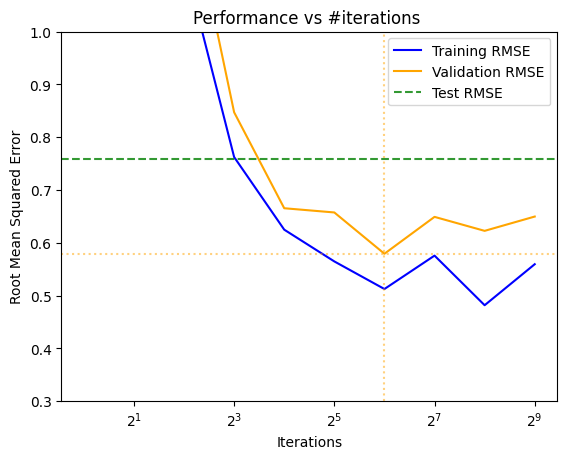

In [11]:
import warnings
from sklearn.exceptions import ConvergenceWarning


warnings.filterwarnings("ignore", category=ConvergenceWarning)

[1,2,4,8,16]
[18,7,5,6,1]   


# restart from original data
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.2) 

# do no forget the scaling :-)
sc = StandardScaler()
sc.fit(X_learn)
X_learn = sc.transform(X_learn)
X_test = sc.transform(X_test)

###################
# INSERT CODE HERE

X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.2) 

###################
## TODO: Split into a training and validation set

# takes as input a model with base parameters "base_params", and finds the best value for hyperparameter "param_key"
# among the speficied values "param_values"
def find_best_param_value(model, base_params, param_key, param_values, X_train, y_train, X_val, y_val):
    
    # initialization of loss vectors (lists)
    rmse_train = [0]*len(param_values)
    rmse_val = [0]*len(param_values)
    
    for i, param_value in enumerate(param_values):
        
        base_params[param_key] = param_value
        model.set_params(**params)
    
        # fit model
        model.fit(X_train, y_train);

        # loss on the training set
        y_pred_train = model.predict(X_train)
        rmse_train[i]=compute_rmse(y_pred_train,y_train)

        # loss on the val set
        y_pred_val = model.predict(X_val)
        rmse_val[i]=compute_rmse(y_pred_val,y_val)
    
    ###################
    # INSERT CODE HERE
    best_loss_val = np.min(rmse_val) # to modify
    best_value = param_values[np.argmin(rmse_val)] # to modify
    
    ###################
    ## TODO: Identify the best performance on the validation set and 
    # the corresponding best value for the considered hyperparameter
    
    return best_value, best_loss_val, rmse_train, rmse_val
    

# definition of model and parameters
model = MLPRegressor()
params = {"hidden_layer_sizes" :(128,128), 
          "learning_rate" : "adaptive",
          "learning_rate_init" : 0.01}
param_key = "max_iter"
param_values = [1,2,4,8,16,32,64,128,256,512]

# find best value for max_iter
best_max_iter, best_loss_val, rmse_train, rmse_val = find_best_param_value(model,
                                                                           params,
                                                                           param_key,
                                                                           param_values, 
                                                                           X_train, 
                                                                           y_train, 
                                                                           X_val, 
                                                                           y_val)

# evaluation on the test set
mlp = MLPRegressor(hidden_layer_sizes=(128,128), 
                   learning_rate="adaptive",
                   learning_rate_init=0.01, 
                   max_iter=best_max_iter)

mlp.fit(X_train,y_train)
y_pred_test = mlp.predict(X_test)
rmse_test=compute_rmse(y_pred_test,y_test)


# results
plt.semilogx(param_values, rmse_train, base=2, color ='blue', label="Training RMSE")
plt.semilogx(param_values, rmse_val, base=2, color ='orange', label="Validation RMSE")
plt.axvline(best_max_iter, color ='orange', linestyle=':', alpha=0.5)
plt.axhline(best_loss_val, color ='orange', linestyle=':', alpha=0.5)
plt.axhline(rmse_test, color ='green', linestyle='--', alpha=0.8, label="Test RMSE")
plt.ylim(0.3,1)
plt.title("Performance vs #iterations ")
plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.legend(loc="best");


<div class="alert alert-info">

**Remark:**
    
Since usually the number of datapoints is pretty limited, once the best model has been chosen based on the validation set, the final chosen model could be retrained on **both** training and validation sets before final evaluation on the test set. Can you see why ?

</div>  

## K-Fold Cross validation

If you have tried to run the previous cells several times you may have observed that the results are a somewhat unstable. This is because we have limited ourselves to a fixed train-validation-test subdivision and depending on the random seed, the results may vary quite a bit. We could obtain more robust results by taking an average over different splits. This is the principle of K-Fold.

<div class='alert alert-info'>

**K-Fold** is a common implementation of cross validation that splits the training data into
separate subsets named folds. All but one of the folds are used to train a regression/classification model and the last one is used to assess the performances of the trained model by
using a validation criterion. This step (commonly named ’split’) is repeated **K times**
in such a way that each fold is being used **K − 1** times as a training fold an 1 time as a
validation fold as depicted on the figure below.


Finally the mean and standard deviation of the performances of the model during each split
are computed. Those values give hints about the performances one could expect from the
trained model.
    
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Alternative text" width="500"/>
    
</div>


<div class="alert alert-success">
    
**Instanciate** a K-fold object from sklearn such that k = 5 
    
</div>

In [15]:
from sklearn.model_selection import KFold

###################
# INSERT CODE HERE

kf=KFold(n_splits = 10)

###################
## TODO: instanciate Kfold object


<div class="alert alert-success">
    
**Complete the implementation** of "run_kfold", a function that runs the previous function "find_best_param_value" on different splits of the data and averages the result for more robust hyperparameter selection. 

</div>

fold 1/10 is done.
fold 2/10 is done.
fold 3/10 is done.
fold 4/10 is done.
fold 5/10 is done.
fold 6/10 is done.
fold 7/10 is done.
fold 8/10 is done.
fold 9/10 is done.
fold 10/10 is done.


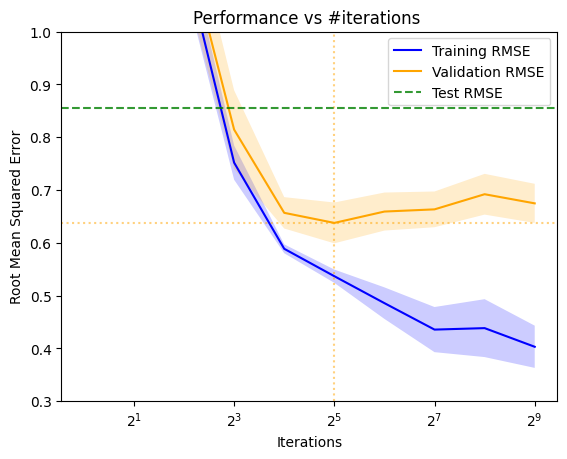

In [16]:
def run_kfold(kf, model, params, param_key, param_values, X, y):
   
    # initialization
    rmse_train_all = np.zeros((kf.get_n_splits(),len(param_values)))
    rmse_val_all = np.zeros((kf.get_n_splits(),len(param_values)))
    
    for i,(train_index, val_index) in enumerate(kf.split(X)):
        X_train_kfold, X_val_kfold = X[train_index], X[val_index]
        y_train_kfold, y_val_kfold = y[train_index], y[val_index]
        
        best_max_iter, best_loss_val, rmse_train, rmse_val = find_best_param_value(model,
                                                                                   params,
                                                                                   param_key,
                                                                                   param_values, 
                                                                                   X_train_kfold, 
                                                                                   y_train_kfold, 
                                                                                   X_val_kfold, 
                                                                                   y_val_kfold)
        rmse_train_all[i,:]=rmse_train[:]
        rmse_val_all[i,:]=rmse_val[:]
        
        print(f"fold {i+1}/{kf.get_n_splits()} is done.")
        
    ###################
    # INSERT CODE HERE
    
    rmse_train_mean = np.mean(rmse_train_all, axis=0)
    rmse_val_mean = np.mean(rmse_val_all, axis=0)
    rmse_train_std = np.std(rmse_train_all, axis=0)
    rmse_val_std = np.std(rmse_val_all, axis=0)
    
    best_loss_val = np.min(rmse_val_mean)
    best_value = param_values[np.argmin(rmse_val_mean)]
    
    ###################
    ## TODO: compute average results and standard deviations. Identify best mean performance on validation set
    # and corresponding best value of the considered hyperparameter
    
    
    return best_value, best_loss_val, rmse_train_mean, rmse_val_mean, rmse_train_std, rmse_val_std


best_max_iter, best_loss_val, rmse_train_mean, rmse_val_mean, rmse_train_std, rmse_val_std = run_kfold(kf, 
                                                                                                       model, 
                                                                                                       params, 
                                                                                                       param_key, 
                                                                                                       param_values, 
                                                                                                       X_learn, 
                                                                                                       y_learn)

# evaluation on the test set
mlp = MLPRegressor(hidden_layer_sizes=(128,128), 
                   learning_rate="adaptive",
                   learning_rate_init=0.01, 
                   max_iter=best_max_iter)

mlp.fit(X_train,y_train)
y_pred_test = mlp.predict(X_test)
rmse_test=compute_rmse(y_pred_test,y_test)


# results
plt.semilogx(param_values, rmse_train_mean, base=2, color='blue', label="Training RMSE")
plt.fill_between(param_values, rmse_train_mean+rmse_train_std, rmse_train_mean-rmse_train_std, facecolor='blue',alpha=0.2)
plt.semilogx(param_values, rmse_val_mean, base=2, color='orange', label="Validation RMSE")
plt.fill_between(param_values, rmse_val_mean+rmse_val_std, rmse_val_mean-rmse_val_std, facecolor='orange',alpha=0.2)
plt.axvline(best_max_iter, color ='orange', linestyle=':', alpha=0.5)
plt.axhline(best_loss_val, color ='orange', linestyle=':', alpha=0.5)
plt.axhline(rmse_test, color ='green', linestyle='--', alpha=0.8, label="Test RMSE")
plt.ylim(0.3,1)
plt.title("Performance vs #iterations ")
plt.xlabel("Iterations")
plt.ylabel("Root Mean Squared Error")
plt.legend(loc="best");


<div class="alert alert-warning">
<b>Question</b>  <br>
Try to think about how the number K of folds may influence the results. What is the effect of taking a small K ? a big K ?    
</div>

# Hyperparameter search

Until now we have only looked at the influence of one hyperparameter. Nevertheless the implementation of "find_best_param_value" and "run-kfold" are already quite cumbersome and perhaps a bit hard to adapt to the combined search of two or more hyperparameters. Fortunately for us, sklearn provides a tool just for that: **GridSearchCV**. It performs grid search in a cross validated fashion to find the best hyperparameters for a model (among predefined values).

<div class="alert alert-info">
    
    
**GridSearch** is a famous method to search for values to set for model hyperparameters. The principle of this method is quite simple: with the definition of the ranges of values to try for each hyperparameter as the single requirement, it applies cross-validation of a model for each possible combination of values and returns the selection that leads to the model with best performances. 
    
    
**Example**: Say a model has 2 hyperparameters, one having 6 discrete values and the other has continuous range of values in range [0,1]. One could select all the possible values for HP1 and 10 specific values for HP2 and perform GridSearch. This would thus imply the cross-validation training of 6x10=60 models. The performances of those models are then compared and the best one is returned with the values its hyperparameters were set to.
    
    
</div>


<div class="alert alert-success">

**Complete the implementation** of "perform_grid_search" function. In particular, fill in the arguments of "make_scorer", a function that enables us to use our custom "compute_rmse" as an evaluation criterion. Also, fill in the arguments of "GridSearchCV". Do not hesitate to check the documentation.

Once you finished the implementation of "perform grid search", experiment with various set of hyperparameters, or even entirely different models! 
    
</div>

In [17]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid, score_function, kf, X, y):
    
    ###################
    # INSERT CODE HERE
    
    score = make_scorer(score_function,greater_is_better=False,)
    grid = GridSearchCV(model,param_grid,cv=kf)

    ###################
    ## TODO: fill in the arguments of "make_scorer" and "GridSearchCV"

    
    grid.fit(X, y) 
    
    return grid


# This parameter definition and function call is equivalent to what we have done before ... 
# much more efficient right ? :-)
model = model = MLPRegressor()
param_grid = {"hidden_layer_sizes" :[(128,128)], 
              "learning_rate" : ["adaptive"],
              "learning_rate_init" : [0.01], 
              "max_iter" : [1,2,4,8,16,32,64,128,256,512]}

grid = perform_grid_search(model, param_grid, compute_rmse, kf, X_learn, y_learn)

# print best parameter after tuning 
print(grid.best_params_) 

#evaluation on test set
y_pred_test = grid.predict(X_test)
rmse_test = compute_rmse(y_pred_test,y_test)


# results
print(f"RMSE on test set:  {rmse_test:5.3f}")

{'hidden_layer_sizes': (128, 128), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 16}
RMSE on test set:  0.696


<div class="alert alert-success">
    
Run the next cell. This shows the performances of each model you trained during your grid search. Can you tell the performances that one could expect from the model using the ’best hyperparameters’ ? Does it correspond to your results when applying the model on the test set?
    
</div>

In [18]:
res = pd.DataFrame(grid.cv_results_.values(), ).transpose()
res.columns=grid.cv_results_.keys()
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_max_iter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022571,0.011728,0.001388,0.002108,"(128, 128)",adaptive,0.01,1,"{'hidden_layer_sizes': (128, 128), 'learning_r...",-8.366138,...,-4.480881,-3.842231,-6.249382,-7.899447,-2.530365,-5.651251,-3.731872,-5.060503,2.053199,10
1,0.040112,0.003918,0.001439,0.002959,"(128, 128)",adaptive,0.01,2,"{'hidden_layer_sizes': (128, 128), 'learning_r...",-3.890892,...,-2.819424,-4.888661,-1.725956,-5.976835,-2.608158,-4.872383,-4.004153,-3.923794,1.285458,9
2,0.078277,0.007852,0.0003,0.000458,"(128, 128)",adaptive,0.01,4,"{'hidden_layer_sizes': (128, 128), 'learning_r...",-1.243459,...,-0.874616,-0.857987,-0.756108,-2.153476,-1.075348,-0.873456,-1.236027,-1.132754,0.379026,8
3,0.149551,0.007783,0.002574,0.003141,"(128, 128)",adaptive,0.01,8,"{'hidden_layer_sizes': (128, 128), 'learning_r...",-0.065319,...,0.069735,0.076123,0.293573,-0.466788,0.047751,0.099599,-0.009864,0.005353,0.184731,7
4,0.392732,0.170337,0.002172,0.003326,"(128, 128)",adaptive,0.01,16,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.415642,...,0.258116,0.497845,0.517222,0.255256,0.252129,0.462157,0.271683,0.358351,0.100139,1
5,0.915278,0.289524,0.001958,0.003457,"(128, 128)",adaptive,0.01,32,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.326355,...,0.195293,0.487613,0.531721,0.290915,0.248228,0.328741,0.283555,0.345035,0.10074,2
6,1.622029,0.456441,0.00182,0.002763,"(128, 128)",adaptive,0.01,64,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.35123,...,0.189562,0.480721,0.479399,0.203273,0.27326,0.420349,0.295664,0.323747,0.111748,3
7,2.074365,0.755444,0.001337,0.001722,"(128, 128)",adaptive,0.01,128,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.352081,...,0.182804,0.537561,0.471922,-0.063065,0.168946,0.241863,0.188472,0.269005,0.160847,6
8,2.323366,1.061773,0.002051,0.002687,"(128, 128)",adaptive,0.01,256,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.275664,...,0.29915,0.353919,0.437851,-0.041776,0.29848,0.457444,0.324881,0.305369,0.128911,4
9,2.67058,0.978385,0.00115,0.00159,"(128, 128)",adaptive,0.01,512,"{'hidden_layer_sizes': (128, 128), 'learning_r...",0.362993,...,0.294662,0.493875,0.486825,-0.125229,0.23878,0.382214,0.28483,0.303631,0.163914,5


<div class="alert alert-info">
    
**Remark:**

Making an exhaustive search among all possible hyperparameters with GridSearch is not always feasible. The number of models to train grows exponentially with the number of hyperparameters you might want to test which causes problems for expensive models that take long training times. We strongly invite you to have a look into the sklearn library for alternatives to brute force parameter search. There are other ways to avoid overfitting and obtain better generalization performances such as regularization or pruning.
    
    
</div>